LaTex

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Bibliothèque

In [2]:
# numpy
import numpy as np

In [3]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [4]:
%matplotlib inline

In [5]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

In [6]:
psi, theta, phi = symbols("psi, theta, phi", real=True)

# Matrices de passage (rotation)
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [ -s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

# Matrices de changement de coordonnées (inverses de R)
def C_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, s],
                  [0, -s,  c]])
def C_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, -s],
                  [ 0, 1, 0],
                  [ s, 0, c]])

def C_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, s, 0],
                  [-s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

# Rotation d'une plaque rectangulaire

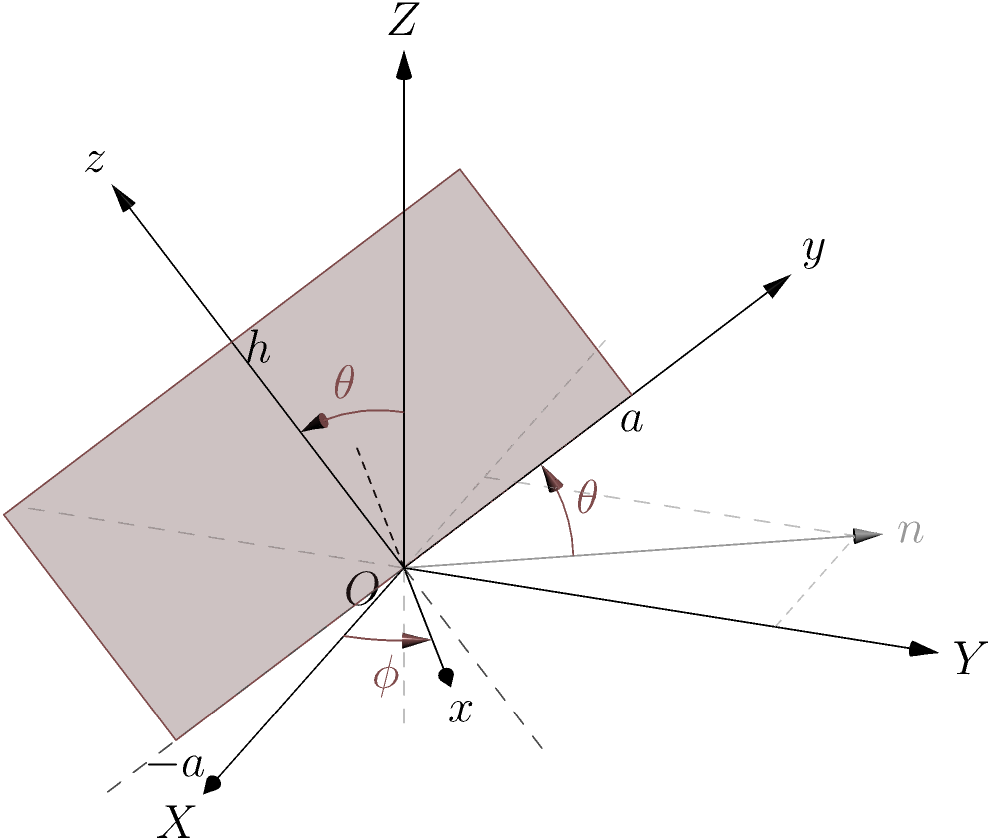

In [9]:
Image(filename='plaque.png', width=500)

On a une plaque $x \in (-a,a), y \in (0,h)$, et on veut décrire sa rotation autour de l'axe mobile $x$ d'angle $\theta$ et autour de l'axe $Z$ d'angle $\phi$ (voir la figure ci-dessus):

1. le repère fixe (XYZ) est ransformé par une rotation $(\bme_Z, \phi)$ dans le repère $(xnZ)$,
2. on transforme $(xnZ)$ dans le repère mobile $(xyz)$ (attaché à la plaque).

On calcule, dans le repère mobile:

- le moment d'inertie
- la vitesse angulaire
- le moment cinétique

In [11]:
# Géométrie
a, h = sy.symbols("a, h", real=True)
M = sy.symbols("M", real=True)

# coordonnées mobiles
x, y, z = sy.symbols("x, y, z", real=True)

In [10]:
# intégrale double sur le triangle
def I_plaque(f):
    return sy.integrate(sy.integrate(f, (z, 0, h)), (y, -a, a))

In [12]:
# aire du triangle A, on a M = rho A
A = I_plaque(1)
A

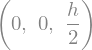

In [13]:
# centre de masse
Rx = 0
Ry = I_plaque(y)/A
Rz = I_plaque(z)/A
Rx, Ry, Rz

## Moment d'inertie

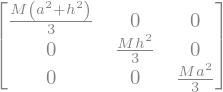

In [16]:
# moment d'inertie
# I_xx, I_yy, I_zz = I_xx + I_yy, I_xy = I_yx = 0
I_xx = sy.simplify( (M/A) * I_plaque(y**2 + z**2) )
I_yy = (M/A) * I_plaque(z**2)
I_zz = (M/A) * I_plaque(y**2)

I = sy.Matrix([[I_xx, 0, 0], [0, I_yy, 0], [0, 0, I_zz]])
I

* Centre de masse: 
    $$\bm R = \frac{h}{2} \hat{\bm e_z}$$
* Moment d'inertie:
    $$I = \frac{M}{3}\mathrm{diag}(a^2+h^2, h^2, a^2 + a^2)$$

## Vitesse angulaire

Le vecteur de vitesse angulaire résulte de la composition de deux rotations: $\dot\phi \bm e_Z$ et $\dot\theta \bm e_x$, il est donc la somme de ces deux vitesses angulaires:
$$\bm \Omega = \dot\phi \bm e_Z + \dot\theta \bm e_x$$

Pour passer dans le repère mobile on utilise les matrices de passage:
$$\bm e_z = R_x(\theta) e_Z \;\Rightarrow\; \bm e_Z = C_x(\theta) \bm e_z$$
On obtient
$$\bm \Omega = \begin{pmatrix}\dot \theta \\ \dot\phi \sin\theta \\ \dot\phi \cos\theta \end{pmatrix}$$

In [29]:
theta, phi = sy.symbols("theta, phi", real = True)
theta_t, phi_t = sy.symbols("theta_t, phi_t", real = True)
theta_tt, phi_tt = sy.symbols("theta_tt, phi_tt", real = True)

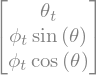

In [26]:
# vitesse angulaire dans le repère mobile
e_1, e_2, e_3 = XYZ() # base canonique
Omega = phi_t * C_x(theta) * e_3 + theta_t * e_1
Omega

### Moment cinétique

$\bm L$ dans le repère mobile $(xyz)$ est
$$\bm L = M \bm R_M \wedge \dot{\bm R}_M + I \bm \Omega = I \bm \Omega $$
puisque la vitesse du centre de masse est nulle dans $(xyz)$:
$$\bm \Omega = \frac{M}{3}\begin{pmatrix}(a^2+h^2)\dot \theta \\ h^2\dot\phi \sin\theta \\ a^2\dot\phi \cos\theta \end{pmatrix}$$

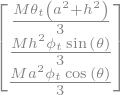

In [28]:
L = I * Omega
L

## Équation d'Euler

La variation temporelle du moment cinétique dans le repère fixe
$$\frac{\D \bm L}{\D t}\Big|_{(XYZ)}$$
est composée d'une partie angulaire 
$$\bm \Omega \wedge \bm L\Big|_{(xyz)}$$
associée au solide et d'une partie
$$\frac{\D \bm L}{\D t}\Big|_{(xyz)}$$
due à la variation de $\bm L$ par rapport au repère mobile:
$$\frac{\D \bm L}{\D t}\Big|_{(XYZ)} = \frac{\D \bm L}{\D t}\Big|_{(xyz)} + \bm \Omega \wedge \bm L\Big|_{(xyz)}$$
En fait cette formule est valable pour tout vecteur $\bm v$.

On obtient:
$$\frac{\D \bm L}{\D t}\Big|_{(XYZ)} = \frac{M}{3} \begin{pmatrix}
(a^2 + h^2)\ddot{\theta} + \frac{a^2-h^2}{2} \dot{\phi}^2 \sin(2\theta) \\
h^2 \ddot{\phi} \sin\theta + 2h^2 \dot\phi \dot\theta \cos\theta \\
a^2 \ddot{\phi} \cos\theta - 2a^2 \dot\phi \dot\theta \sin\theta \end{pmatrix}$$

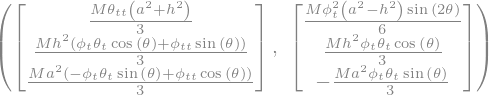

In [37]:
# équation d'Euler dans le repère mobile
lxt = theta_tt
lyt = phi_tt*sy.sin(theta) + phi_t*theta_t*sy.cos(theta)
lzt = phi_tt*sy.cos(theta) - phi_t*theta_t*sy.sin(theta)

L_t = I * sy.Matrix([[lxt],[lyt],[lzt]])
OL = sy.simplify( Omega.cross(L) )
L_t, OL

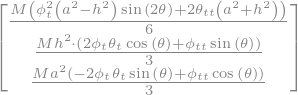

In [39]:
dL = sy.simplify( L_t + OL )
dL

### Repère $(xnZ)$

On peut aussi exprimer les équations de variation du moment cinétique dans le repère intermédiare $(xnZ)$; pour cela il suffit d'utiliser les formules du changement de base $(xyz) \rightarrow (xnZ)$:
$$\bm e_y = R_x(\theta) e_n, \quad \bm e_z = R_x(\theta) \bm e_Z$$

Il faut en outre, tenir compte de la rotation du repère $(xnZ)$ par rapport à $(XYZ)$: $\bm \omega = \dot\phi \bm e_Z$:
$$\frac{\D \bm L}{\D t}\Big|_{(XYZ)} = \frac{\D \bm L}{\D t}\Big|_{(xnZ)} + \bm \omega \wedge \bm L\Big|_{(xnZ)}$$

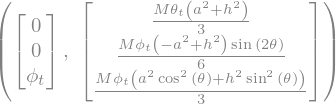

In [52]:
on = phi_t * e_3
Ln = sy.simplify( R_x(theta)*L )
on, Ln

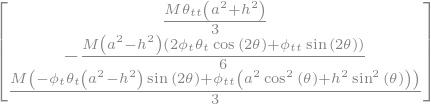

In [49]:
on_t = phi_tt * e_3
lnx = Ln[0].subs(theta_t, theta_tt)
lny = Ln[1].subs(phi_t,phi_tt) + diff(Ln[1],theta) * theta_t
lnz = Ln[2].subs(phi_t,phi_tt) + diff(Ln[2],theta) * theta_t
Ln_t = sy.simplify( sy.Matrix([[lnx],[lny],[lnz]]) )
Ln_t

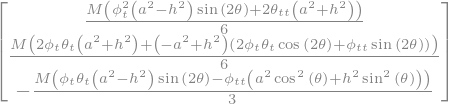

In [51]:
sy.simplify( Ln_t + on.cross(Ln) )

# Brouillon

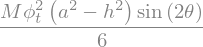

In [42]:
# vérification avec la formule générale (voir cinématique)
sy.simplify( (I[2,2]-I[1,1]) * Omega[1]*Omega[2] )

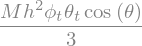

In [43]:
sy.simplify( (I[0,0]-I[2,2]) * Omega[2]*Omega[0] )